**ARCHIE MANALO**

**BSCS 4B**

**CSST 106**

**MACHINE PROBLEM 5**

**INSTALL DEPENDENCIES**

In [1]:
!pip install opencv-python tensorflow

**Download YOLO Weights and Configuration**

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-10-15 14:04:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.6MB/s    in 11s     

2024-10-15 14:04:26 (20.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-10-15 14:04:26--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

**Load YOLO Model and Perform Detection:**

In [3]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the YOLOv3 model from a pre-trained weights file
model_path = 'yolov3.weights'
cfg_path = 'yolov3.cfg'

In [18]:
# Load the YOLO network
net = cv2.dnn.readNetFromDarknet(cfg_path, model_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [19]:
# Load the class labels for COCO dataset
classes_path = 'coco.names'
with open(classes_path, 'r') as f:
    class_names = f.read().strip().split('\n')

In [62]:
# Load an image with multiple objects
image_path = 'tri.jpg'
image = cv2.imread(image_path)
height, width = image.shape[:2]

In [63]:
# Create a 4D blob from the image (input preprocessing)
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [64]:
# Get the YOLO layer names for the model
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [65]:
# Perform the forward pass (detect objects)
outputs = net.forward(output_layers)

**Step 3: Object Detection**

In [66]:
def detect_objects(image_path):
    image = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if image is None:
        print(f"Error loading image: {image_path}")
        return None  # Return None if the image could not be loaded

    height, width = image.shape[:2]

    # Create a 4D blob from the image (input preprocessing)
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get the YOLO layer names for the model
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Perform the forward pass (detect objects)
    outputs = net.forward(output_layers)

    # Initialize variables for bounding boxes, confidences, and class ids
    boxes = []
    confidences = []
    class_ids = []

In [67]:
# Loop over each detection in the output
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Confidence threshold
            # Extract bounding box coordinates
            box = detection[:4] * np.array([width, height, width, height])
            center_x, center_y, w, h = box.astype('int')

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maxima suppression to reduce overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

**Step 4: Visualize Detected Objects**

In [68]:
import matplotlib.pyplot as plt

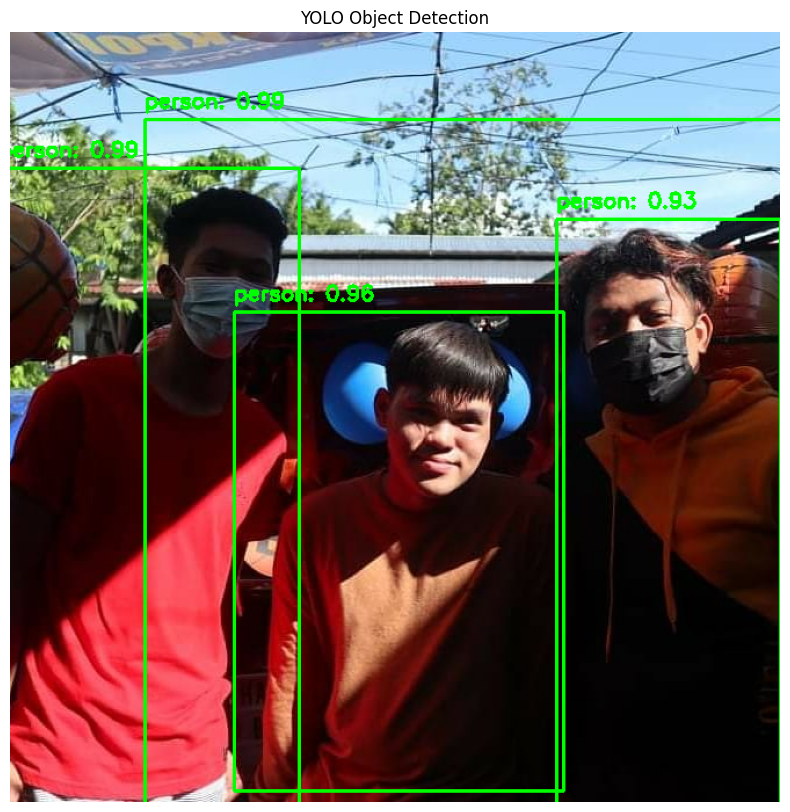

In [69]:
# Draw bounding boxes and labels
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the output image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLO Object Detection')
plt.show()

**TESTING WITH MULTIPLE IMAGES**

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def load_yolo_model(weights_path, config_path):
    yolo_net = cv2.dnn.readNet(weights_path, config_path)
    layer_names = yolo_net.getLayerNames()

    # Get the index of the output layer
    output_layer_index = yolo_net.getUnconnectedOutLayers()

    # Use the index to get the name of the output layer
    output_layers = [layer_names[i - 1] for i in output_layer_index]
    return yolo_net, output_layers

In [79]:
# Load class labels
def load_class_labels(labels_path):
    with open(labels_path, 'r') as f:
        classes = [line.strip() for line in f.readlines()]
    return classes

In [97]:
# Detect objects in the images
def detect_objects_in_images(image_paths, yolo_net, output_layers, classes):
    for img_path in image_paths:
        image = cv2.imread(img_path)
        height, width, _ = image.shape

        # Prepare the image for YOLO
        input_size = 416
        image_resized = cv2.resize(image, (input_size, input_size))
        blob = cv2.dnn.blobFromImage(image_resized, 1/255.0, (input_size, input_size), (0, 0, 0), swapRB=True, crop=False)

        # Set the input to the network
        yolo_net.setInput(blob)
        detections = yolo_net.forward(output_layers)

        # Initialize lists for detected bounding boxes, confidences, and class IDs
        boxes = []
        confidences = []
        class_ids = []

        # Process the detections
        for output in detections:
            for detection in output:
                scores = detection[5:]  # Get class scores
                class_id = np.argmax(scores)  # Get class ID
                confidence = scores[class_id]  # Get confidence score

                if confidence > 0.5:  # Only consider detections with confidence > 0.5
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Calculate the top-left corner of the bounding box
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])  # Append box
                    confidences.append(float(confidence))  # Append confidence
                    class_ids.append(class_id)  # Append class ID

        # Apply Non-Maximum Suppression to avoid overlapping boxes
        indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # Draw bounding boxes on the original image
        for i in indices:
            box = boxes[i]
            x, y, w, h = box
            label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the image with bounding boxes
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Detected Objects in {img_path}') # Now img_path is accessible
        plt.show()

In [99]:
# Paths to YOLO files and images
weights_path = 'yolov3.weights'
config_path = 'yolov3.cfg'
labels_path = 'coco.names'
image_paths = ['tri.jpg', 'kuto.jpg', 'gg.jpg']  # List of image paths

In [102]:
# Load YOLO model and labels
yolo_net, output_layers = load_yolo_model(weights_path, config_path)
classes = load_class_labels(labels_path)

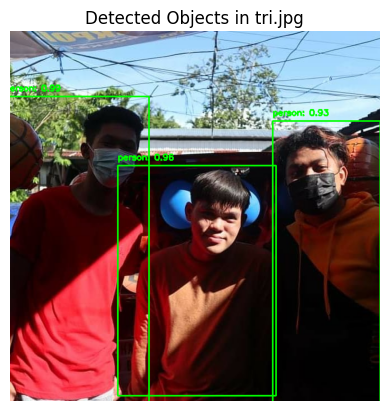

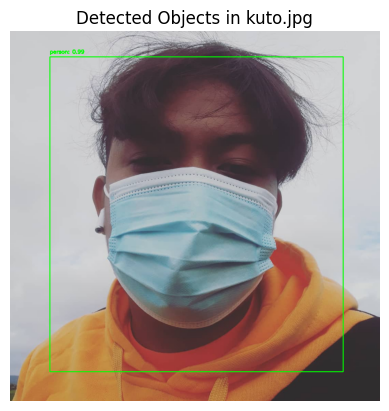

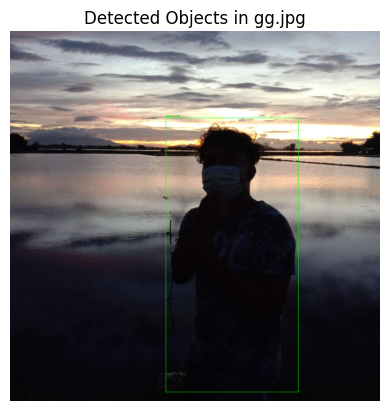

In [103]:
# Detect objects in the provided images
detect_objects_in_images(image_paths, yolo_net, output_layers, classes)

In [111]:
# Time YOLO
start_time = time.time()
# Run YOLO code here
end_time = time.time()
yolo_time = end_time - start_time

# Time SSD
start_time = time.time()
# Run SSD code here
end_time = time.time()
ssd_time = end_time - start_time

# Print comparison
print(f"YOLO Time: {yolo_time} seconds")
print(f"SSD Time: {ssd_time} seconds")

YOLO Time: 3.695487976074219e-05 seconds
SSD Time: 2.3126602172851562e-05 seconds
